# Exploratory Data Anaysis and Predictive Modeling 
## Fenglan Jiang 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from IPython.display import Image
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import accuracy_score 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


Bad key "text.kerning_factor" on line 4 in
/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Data Exploration 

In [2]:
## Load datasets
data = pd.read_csv("~/Desktop/train.csv")
unique = pd.read_csv("~/Desktop/unique_m.csv")

In [3]:
data[['number_of_elements']].idxmax()

number_of_elements    5231
dtype: int64

In [4]:
unique

H  He   Li   Be    B    C    N     O    F  Ne  ...   Au   Hg   Tl  \
0      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
1      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
2      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
3      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
4      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
...    ...  ..  ...  ...  ...  ...  ...   ...  ...  ..  ...  ...  ...  ...   
21258  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   
21259  0.0   0  0.0  0.0  0.0  0.0  0.0  11.0  0.0   0  ...  0.0  0.0  1.0   
21260  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   
21261  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   
21262  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   

        Pb   Bi  Po  At  Rn  critical_temp                material  
0      0.0  0.0   0   0   0          29.00         Ba0.2La1.8Cu1O4  
1      0.0  0.0   0   0   0          26.00  Ba0.1La1.9Ag0.1Cu0.9O4  
2      0.0  0.0   0   0   0          19.00         Ba0.1La1.9Cu1O4  
3      0.0  0.0   0   0   0          22.00       Ba0.15La1.85Cu1O4  
4      0.0  0.0   0   0   0          23.00         Ba0.3La1.7Cu1O4  
...    ...  ...  ..  ..  ..            ...                     ...  
21258  0.0  0.0   0   0   0           2.44      Tm0.84Lu0.16Fe3Si5  
21259  0.0  0.0   0   0   0         122.10         Tl1Ba2Ca3Cu4O11  
21260  0.0  0.0   0   0   0           1.98              Nb0.8Pd0.2  
21261  0.0  0.0   0   0   0           1.84            Nb0.69Pd0.31  
21262  0.0  0.0   0   0   0          12.80           Fe1Se0.2Te0.8  

[21263 rows x 88 columns]

### Unique dataset

Text(0, 0.5, 'Frequency')

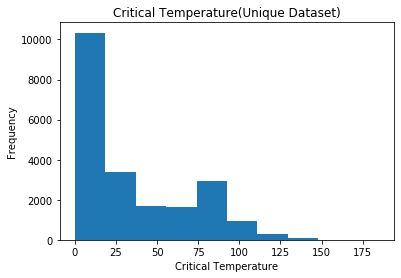

In [5]:
## Plot the critical temperature distribution 
unique.iloc[:,-2].max() ##185.0
unique.iloc[:,-2].min() ##0.00021

plt.hist(unique['critical_temp'])
plt.title('Critical Temperature(Unique Dataset)')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')

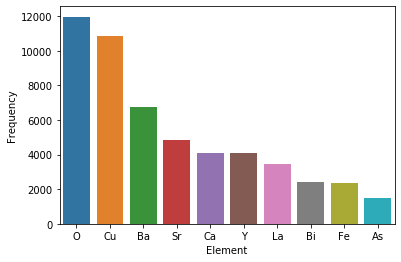

In [6]:
## Count how many nonzero numbers in columns of unique dataset 
## O, Ba, Cu, Ca, Sr, Y
freq = unique.iloc[:,:86].astype(bool).sum(axis=0).sort_values(ascending = False).head(10)
freq = pd.DataFrame(freq).reset_index()
freq.columns = ['Element','Frequency']
sns.barplot(x="Element", y="Frequency", data=freq)

In [7]:
ele_mat = unique.select_dtypes(include=np.number).corr()
element_head10 = ele_mat.iloc[:,-1].sort_values(ascending = False).head(10)
element_tail10 = ele_mat.iloc[:,-1].sort_values(ascending = False).tail(20)
element_head10

critical_temp    1.000000
O                0.566852
Ba               0.558766
Cu               0.518620
Ca               0.302206
Sr               0.271127
Y                0.248097
Hg               0.218970
Tl               0.173887
Bi               0.162499
Name: critical_temp, dtype: float64

In [8]:
## Choose features from this dataset to do prediction later
unique4 = unique[['O','Ba','Cu','Ca','Sr','Y']]

### Train dataset

Text(0, 0.5, 'Frequency')

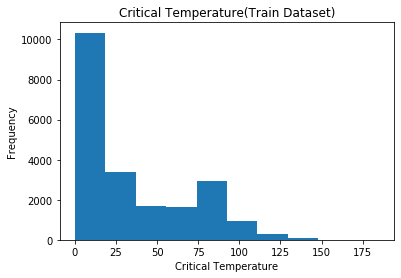

In [9]:
## Critical Temperature distribution(overview)
data.iloc[:,-1].max() ##185.0
data.iloc[:,-1].min() ##0.00021

plt.hist(data.iloc[:,-1])
plt.title('Critical Temperature(Train Dataset)')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')

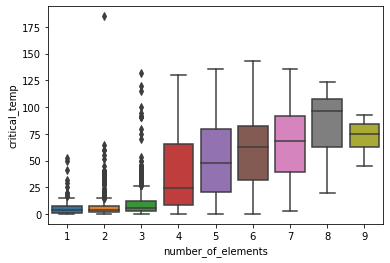

In [10]:
## Plot for the number of elements and critical temp 
sns.boxplot(data.iloc[:,0],data.iloc[:,-1])

In [11]:
## Find out the correaltion matrix 
## Not only positive correlations, but also negative correlations
corr_mat = data.select_dtypes(include=np.number).corr()
corr_mat

## 10 features that have the highest positive correlation with critical temp
head_10 = corr_mat.iloc[-1,:].sort_values(ascending = False).head(11)
head_10

## 10 features that have the highest negative correlation with critical temp
tail_10 = corr_mat.iloc[-1,:].sort_values(ascending = False).tail(10)
tail_10

gmean_FusionHeat       -0.431795
wtd_gmean_FusionHeat   -0.432365
wtd_mean_Density       -0.433940
wtd_range_Valence      -0.439901
wtd_gmean_Density      -0.540046
gmean_Density          -0.541684
gmean_Valence          -0.573068
mean_Valence           -0.600085
wtd_gmean_Valence      -0.615653
wtd_mean_Valence       -0.632401
Name: critical_temp, dtype: float64

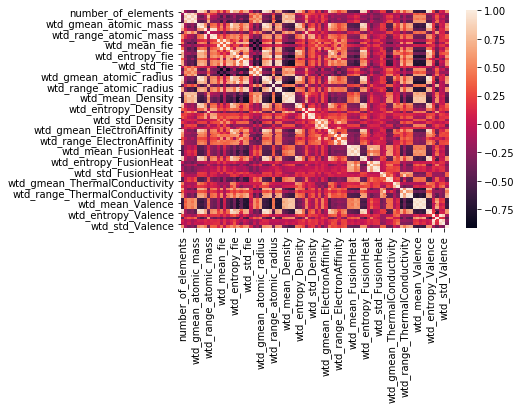

In [12]:
sns.heatmap(corr_mat)

# Select Features Based On Correlation 

### Heatmaps based on category of the features

In [13]:
## Explore the data by categories(ex. atomic mass, fie, atomic radius, etc.)
atomic_mass = data.loc[:,[col for col in data.columns if 'atomic_mass' in col]]
fie = data.loc[:,[col for col in data.columns if 'fie' in col]]
valence = data.loc[:,[col for col in data.columns if 'Valence' in col]]
atomic_radius = data.loc[:,[col for col in data.columns if 'atomic_radius' in col]]
density = data.loc[:,[col for col in data.columns if 'Density' in col]]
electron_affinity = data.loc[:,[col for col in data.columns if 'ElectronAffinity' in col]]
fusionheat = data.loc[:,[col for col in data.columns if 'FusionHeat' in col]]
thermal_conduct = data.loc[:,[col for col in data.columns if 'ThermalConductivity' in col]]

cri_temp = data.iloc[:,-1]
num_element = data.iloc[:,0]

[Text(0.5, 1, 'Fie')]

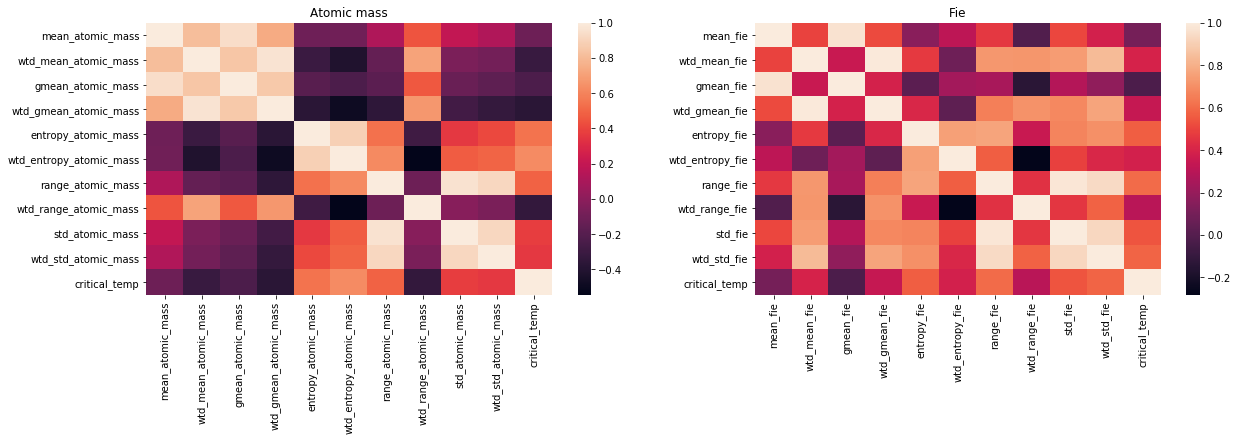

In [14]:
## heapmap based on each category
fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

atomic_mass['critical_temp'] = data.iloc[:,-1]
at_mass = atomic_mass.select_dtypes(include=np.number).corr()
sns.heatmap(at_mass,cmap="rocket",ax=ax).set(title ='Atomic mass')

fie['critical_temp'] = data.iloc[:,-1]
fi = fie.select_dtypes(include=np.number).corr()
sns.heatmap(fi,cmap="rocket", ax=ax2).set(title ='Fie')

[Text(0.5, 1, 'Atomic radius')]

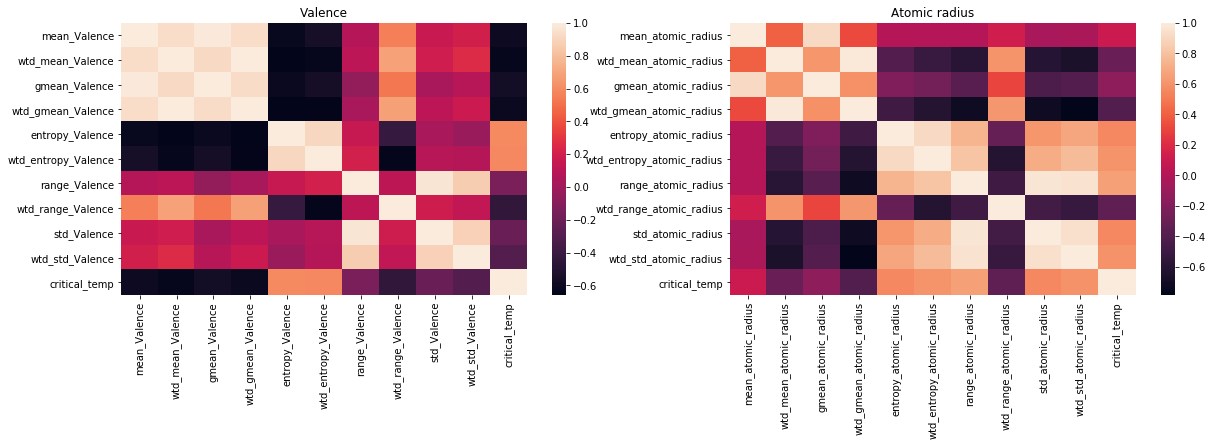

In [15]:
fig,(ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

valence['critical_temp'] = data.iloc[:,-1]
val = valence.select_dtypes(include=np.number).corr()
sns.heatmap(val,cmap="rocket",ax=ax).set(title ='Valence')

atomic_radius['critical_temp'] = data.iloc[:,-1]
at_rad = atomic_radius.select_dtypes(include=np.number).corr()
sns.heatmap(at_rad,cmap="rocket", ax=ax2).set(title ='Atomic radius')

[Text(0.5, 1, 'Electron Affinity')]

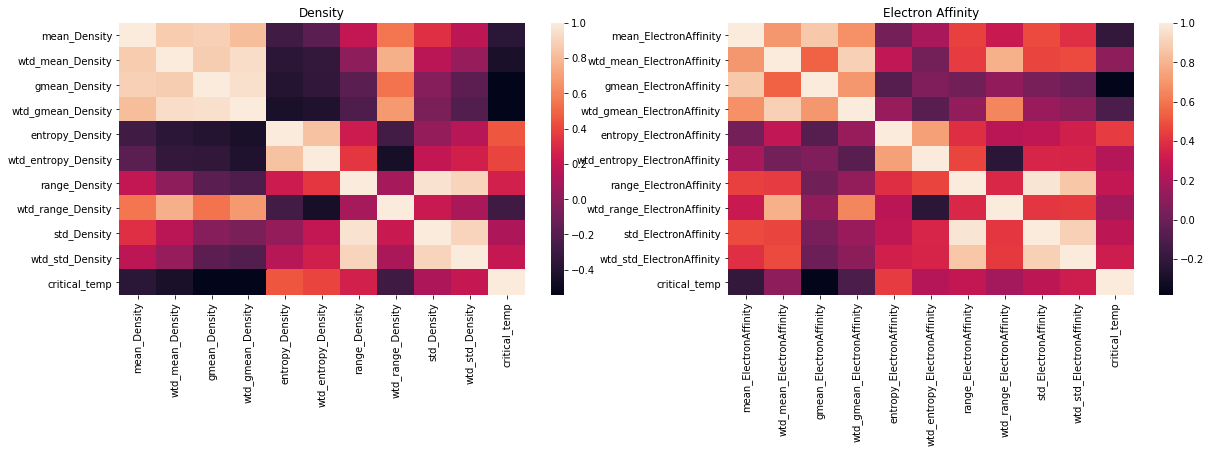

In [16]:
fig,(ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

density['critical_temp'] = data.iloc[:,-1]
den = density.select_dtypes(include=np.number).corr()
sns.heatmap(den,cmap="rocket",ax=ax).set(title ='Density')

electron_affinity['critical_temp'] = data.iloc[:,-1]
ele = electron_affinity.select_dtypes(include=np.number).corr()
sns.heatmap(ele,cmap="rocket", ax=ax2).set(title ='Electron Affinity')

[Text(0.5, 1, 'Themal Conduct')]

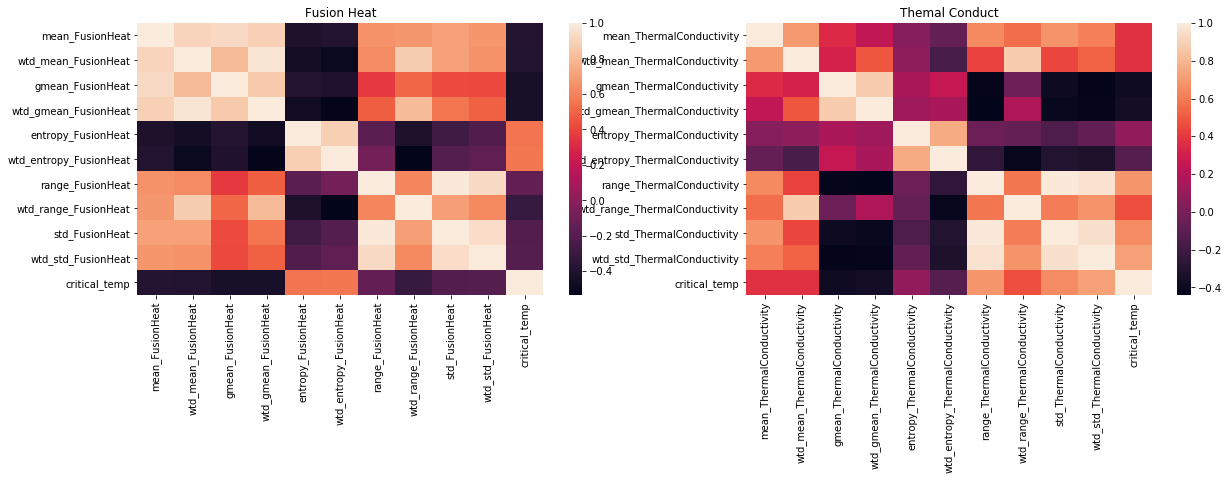

In [17]:
fig,(ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

fusionheat['critical_temp'] = data.iloc[:,-1]
fu = fusionheat.select_dtypes(include=np.number).corr()
sns.heatmap(fu,cmap="rocket",ax=ax).set(title ='Fusion Heat')

thermal_conduct['critical_temp'] = data.iloc[:,-1]
the = thermal_conduct.select_dtypes(include=np.number).corr()
sns.heatmap(the,cmap="rocket", ax=ax2).set(title ='Themal Conduct')

In [18]:
## Find the highest correlation with critical temp in each feature category
## Atomic mass: wtd_entropy_atomic_mass 0.626930, wtd_gmean_atomic_mass  -0.369858
at_mass_mat = atomic_mass.select_dtypes(include=np.number).corr()
at_mass_mat.iloc[:,-1].sort_values(ascending = False)

## Fie: range_fie  0.600790, gmean_fie -0.025103
fie_mat = fie.select_dtypes(include=np.number).corr()
fie_mat.iloc[:,-1].sort_values(ascending = False)

## Valence: entropy_Valence 0.598591, wtd_mean_Valence -0.632401
valence_mat = valence.select_dtypes(include=np.number).corr()
valence_mat.iloc[:,-1].sort_values(ascending = False)

## atomic radius: range_atomic_radius   0.653759, wtd_gmean_atomic_radius   -0.405176
atomic_radius_mat = atomic_radius.select_dtypes(include=np.number).corr()
atomic_radius_mat.iloc[:,-1].sort_values(ascending = False)

## density: entropy_Density 0.457169,  gmean_Density  -0.541684
density_mat = density.select_dtypes(include=np.number).corr()
density_mat.iloc[:,-1].sort_values(ascending = False)

## electron_affinity: entropy_ElectronAffinity  0.437207, gmean_ElectronAffinity -0.380568
electron_affinity_mat = electron_affinity.select_dtypes(include=np.number).corr()
electron_affinity_mat.iloc[:,-1].sort_values(ascending = False)

## fusionheat: wtd_entropy_FusionHeat  0.563244, wtd_gmean_FusionHeat   -0.432365
fusionheat_mat = fusionheat.select_dtypes(include=np.number).corr()
fusionheat_mat.iloc[:,-1].sort_values(ascending = False)

## thermal_conduct: wtd_std_ThermalConductivity 0.721271, gmean_ThermalConductivity  -0.387192
thermal_conduct_mat = thermal_conduct.select_dtypes(include=np.number).corr()
thermal_conduct_mat.iloc[:,-1].sort_values(ascending = False)

critical_temp                      1.000000
wtd_std_ThermalConductivity        0.721271
range_ThermalConductivity          0.687654
std_ThermalConductivity            0.653632
wtd_range_ThermalConductivity      0.469572
wtd_mean_ThermalConductivity       0.379336
mean_ThermalConductivity           0.375813
entropy_ThermalConductivity        0.085862
wtd_entropy_ThermalConductivity   -0.116728
wtd_gmean_ThermalConductivity     -0.371601
gmean_ThermalConductivity         -0.387192
Name: critical_temp, dtype: float64

### Pairplot based on each kind of variables

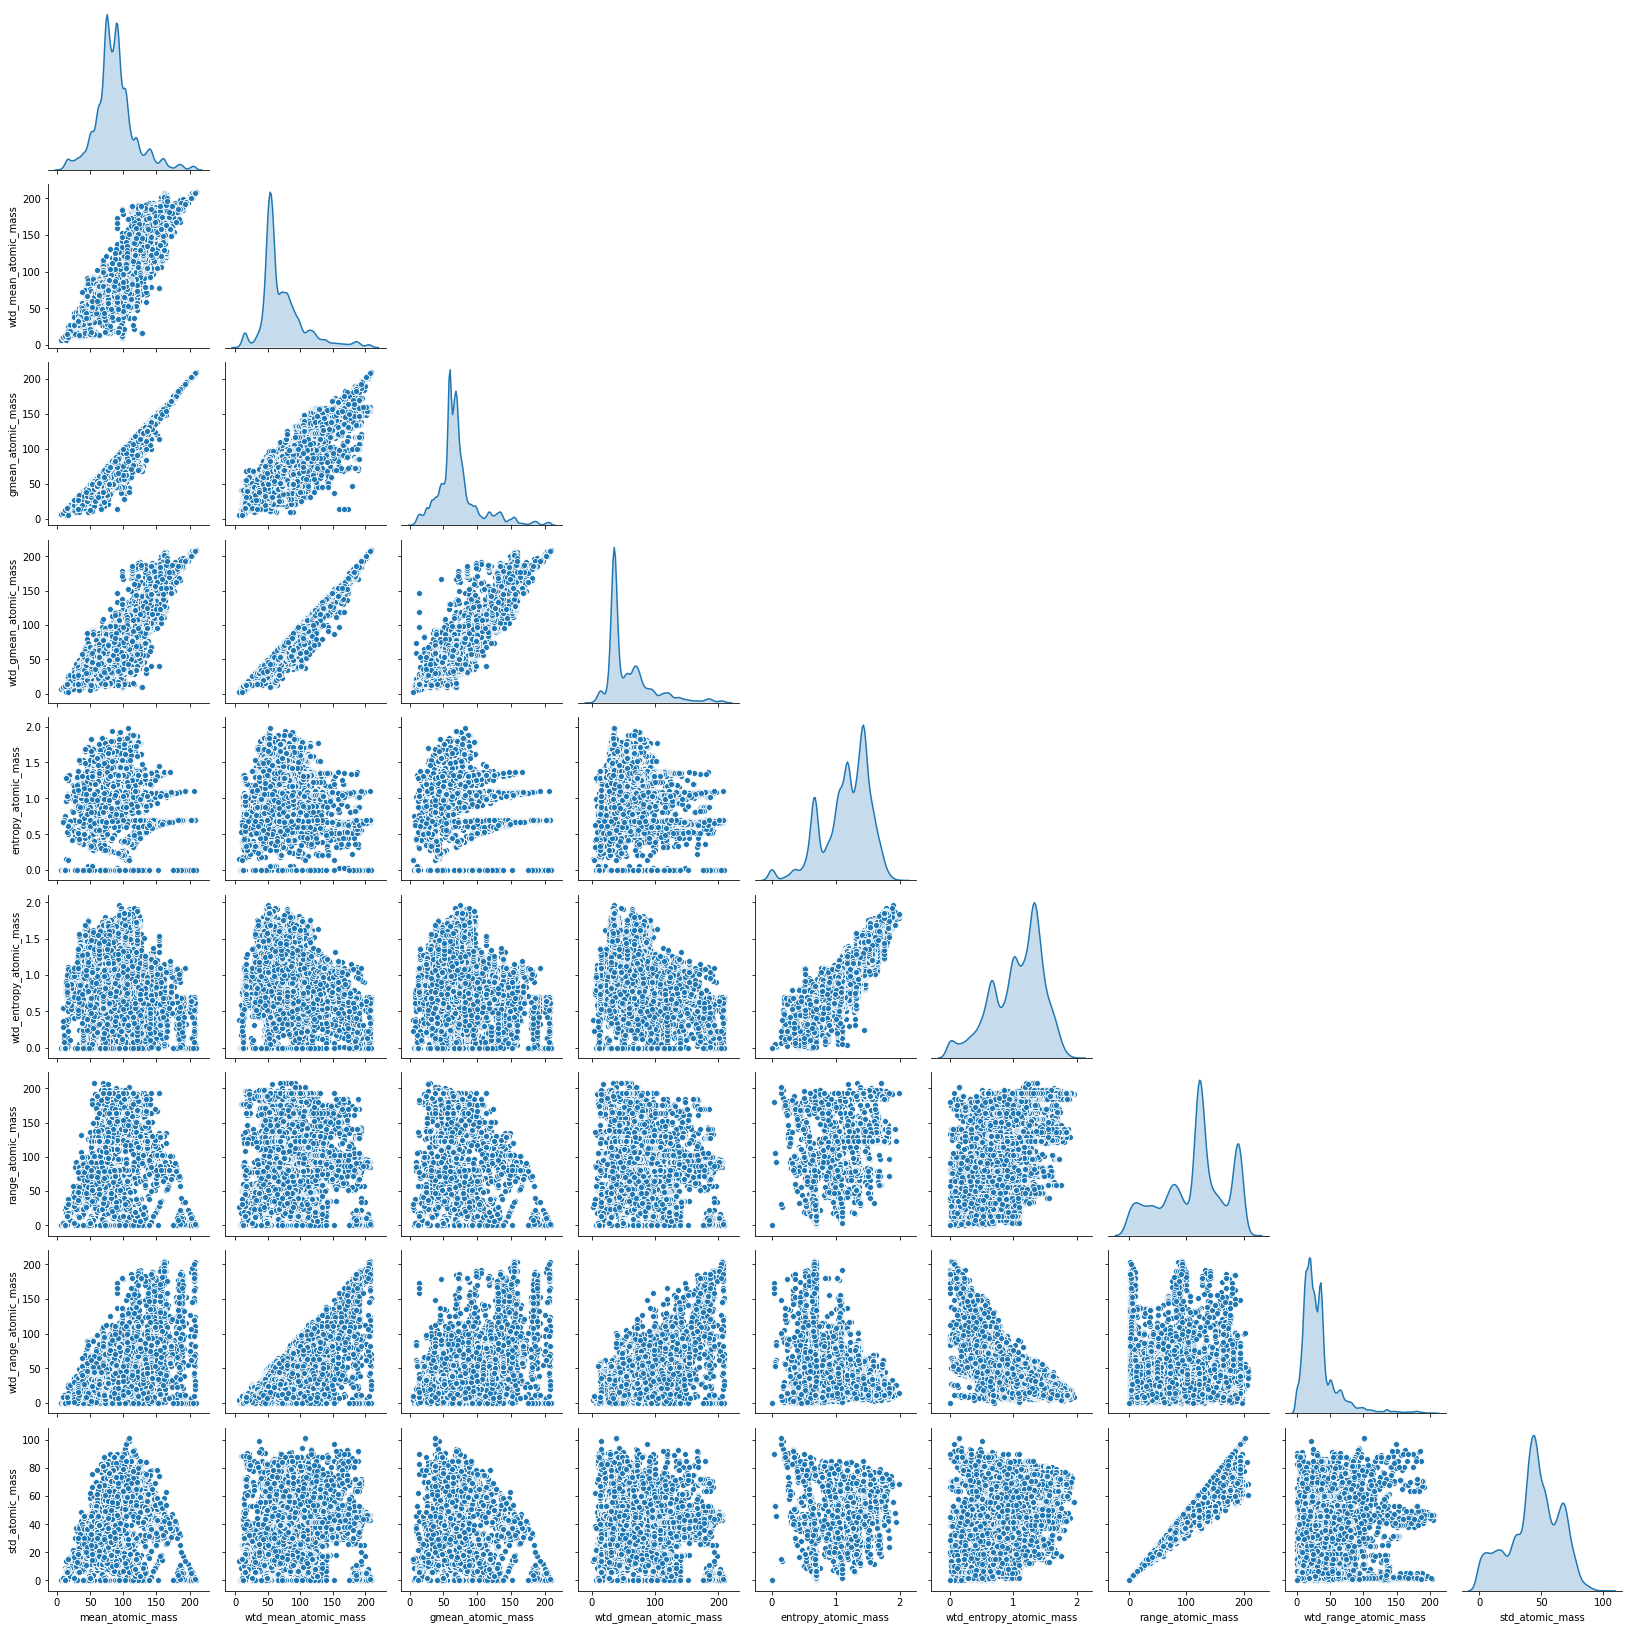

In [19]:
### Pairplot based on each category 
## drop gmean_atomic_mass, wtd_gmean_atomic_mass, range_atomic_mass
g1 = sns.pairplot(atomic_mass.iloc[:,0:9], diag_kind="kde",corner=True)

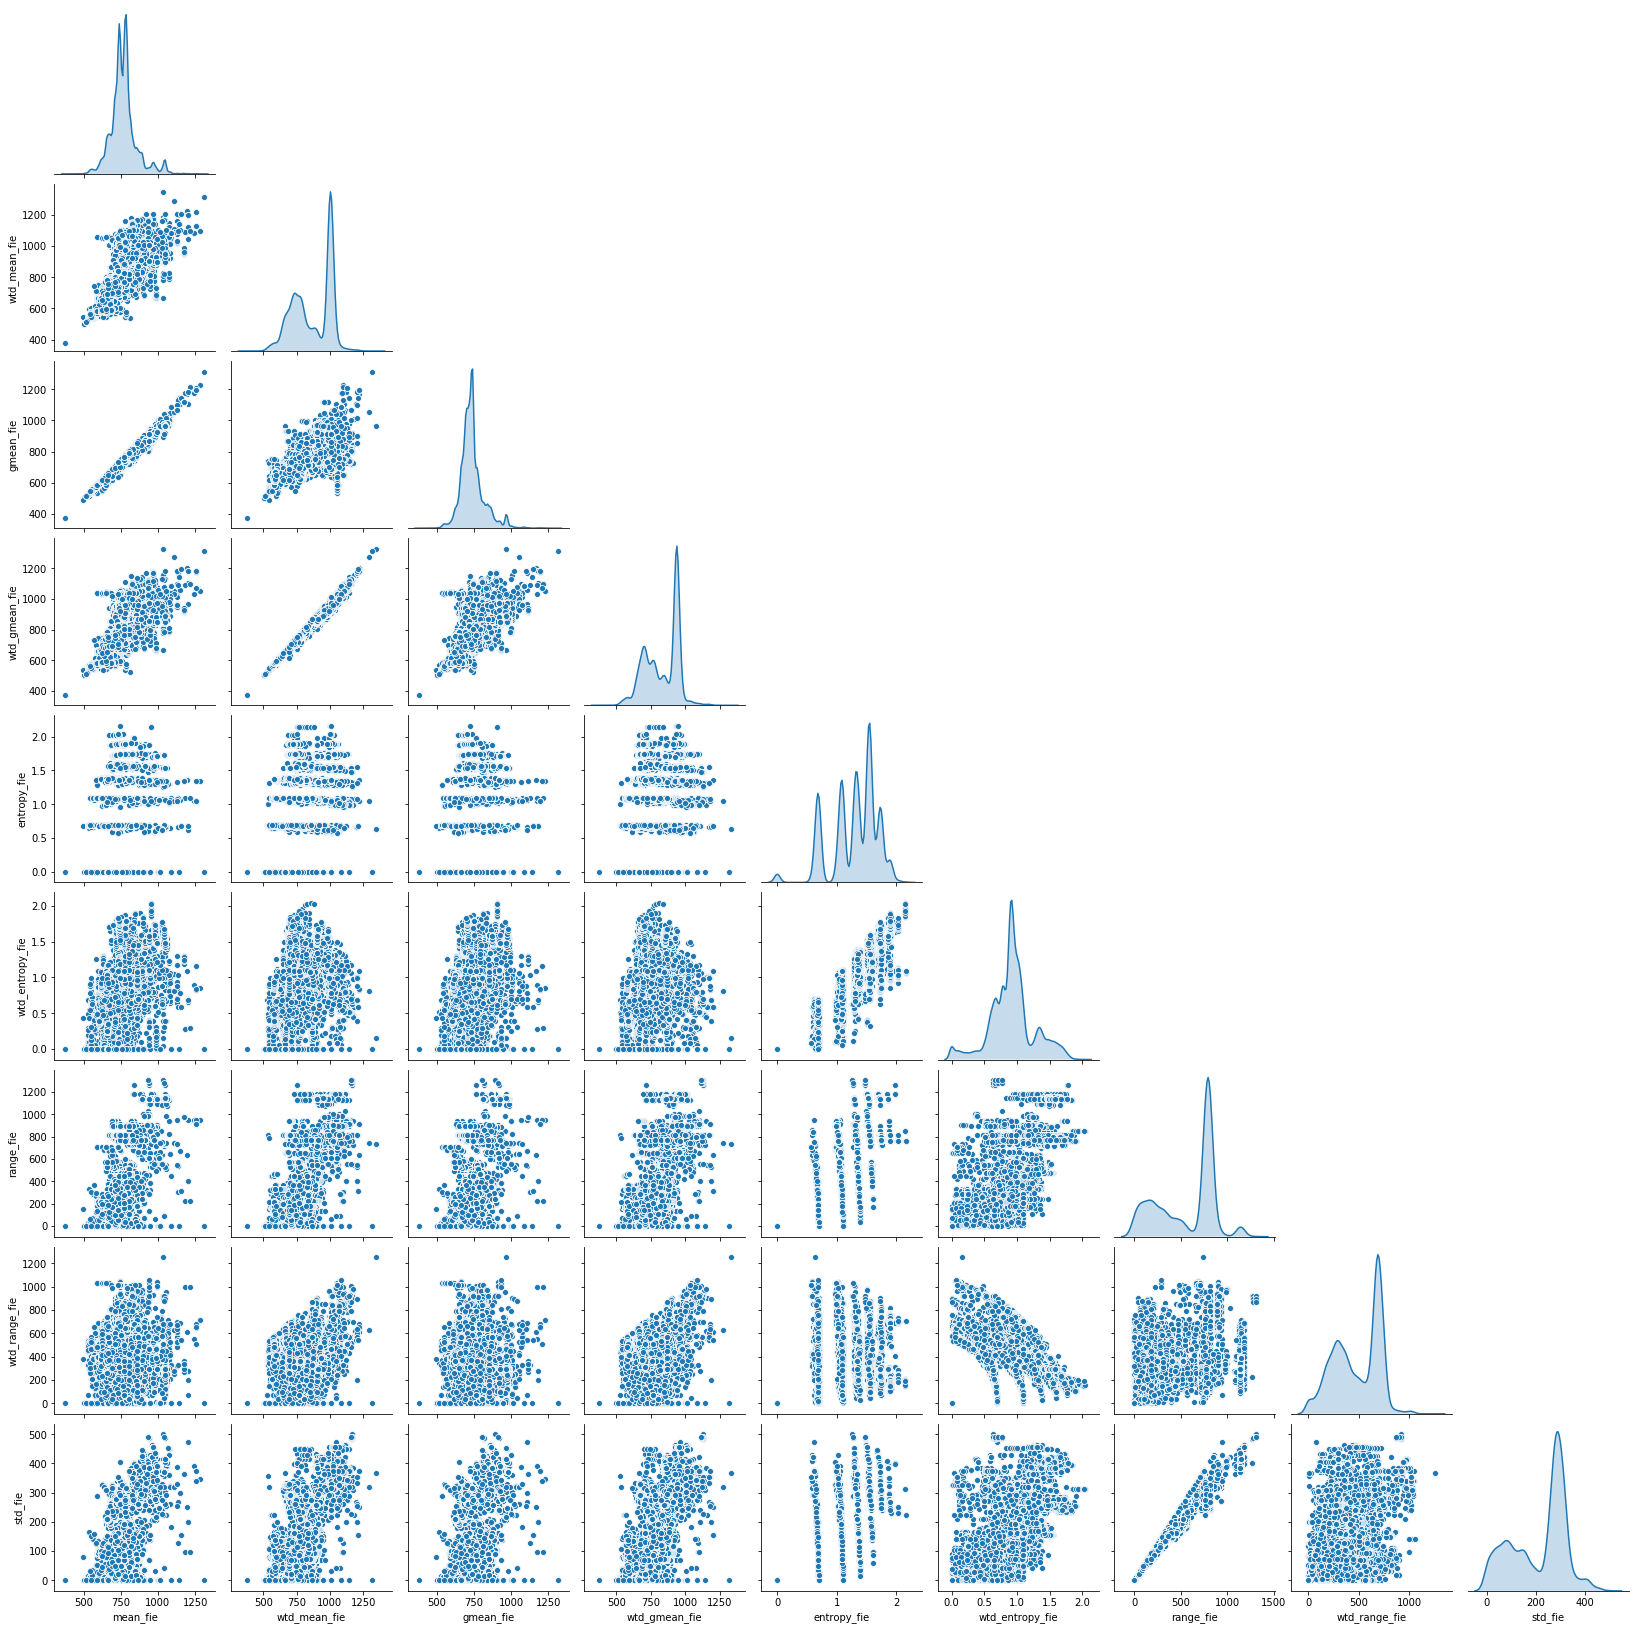

In [20]:
## drop gmean_fie, wtd_gmean_fie, range_fie
g2 = sns.pairplot(fie.iloc[:,0:9], diag_kind="kde",corner=True)

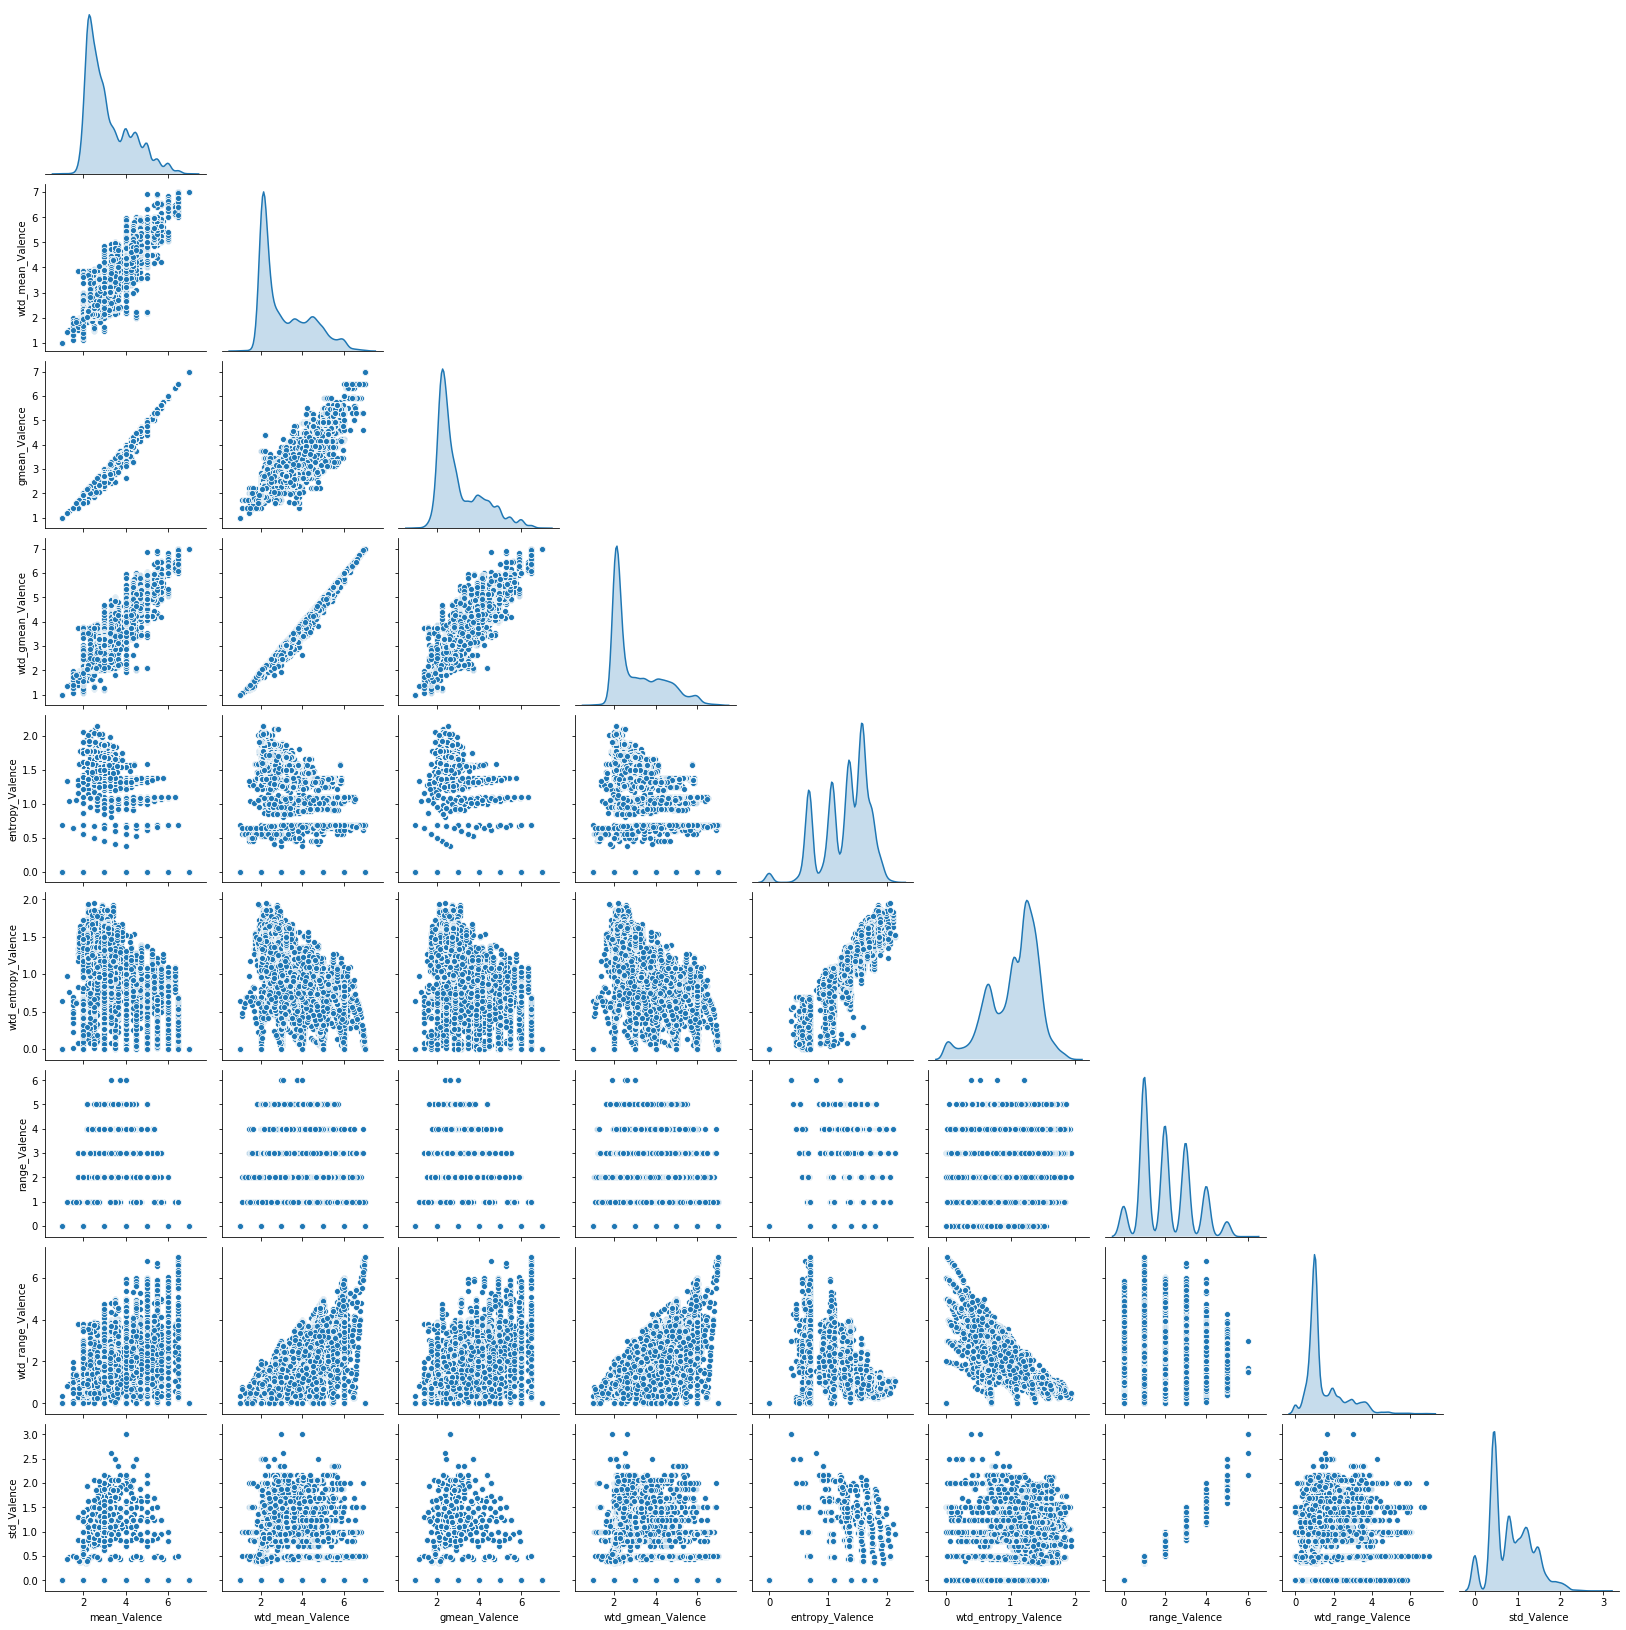

In [21]:
## drop gmean_valence, wtd_gmean_valence
g3 = sns.pairplot(valence.iloc[:,0:9], diag_kind="kde",corner=True)

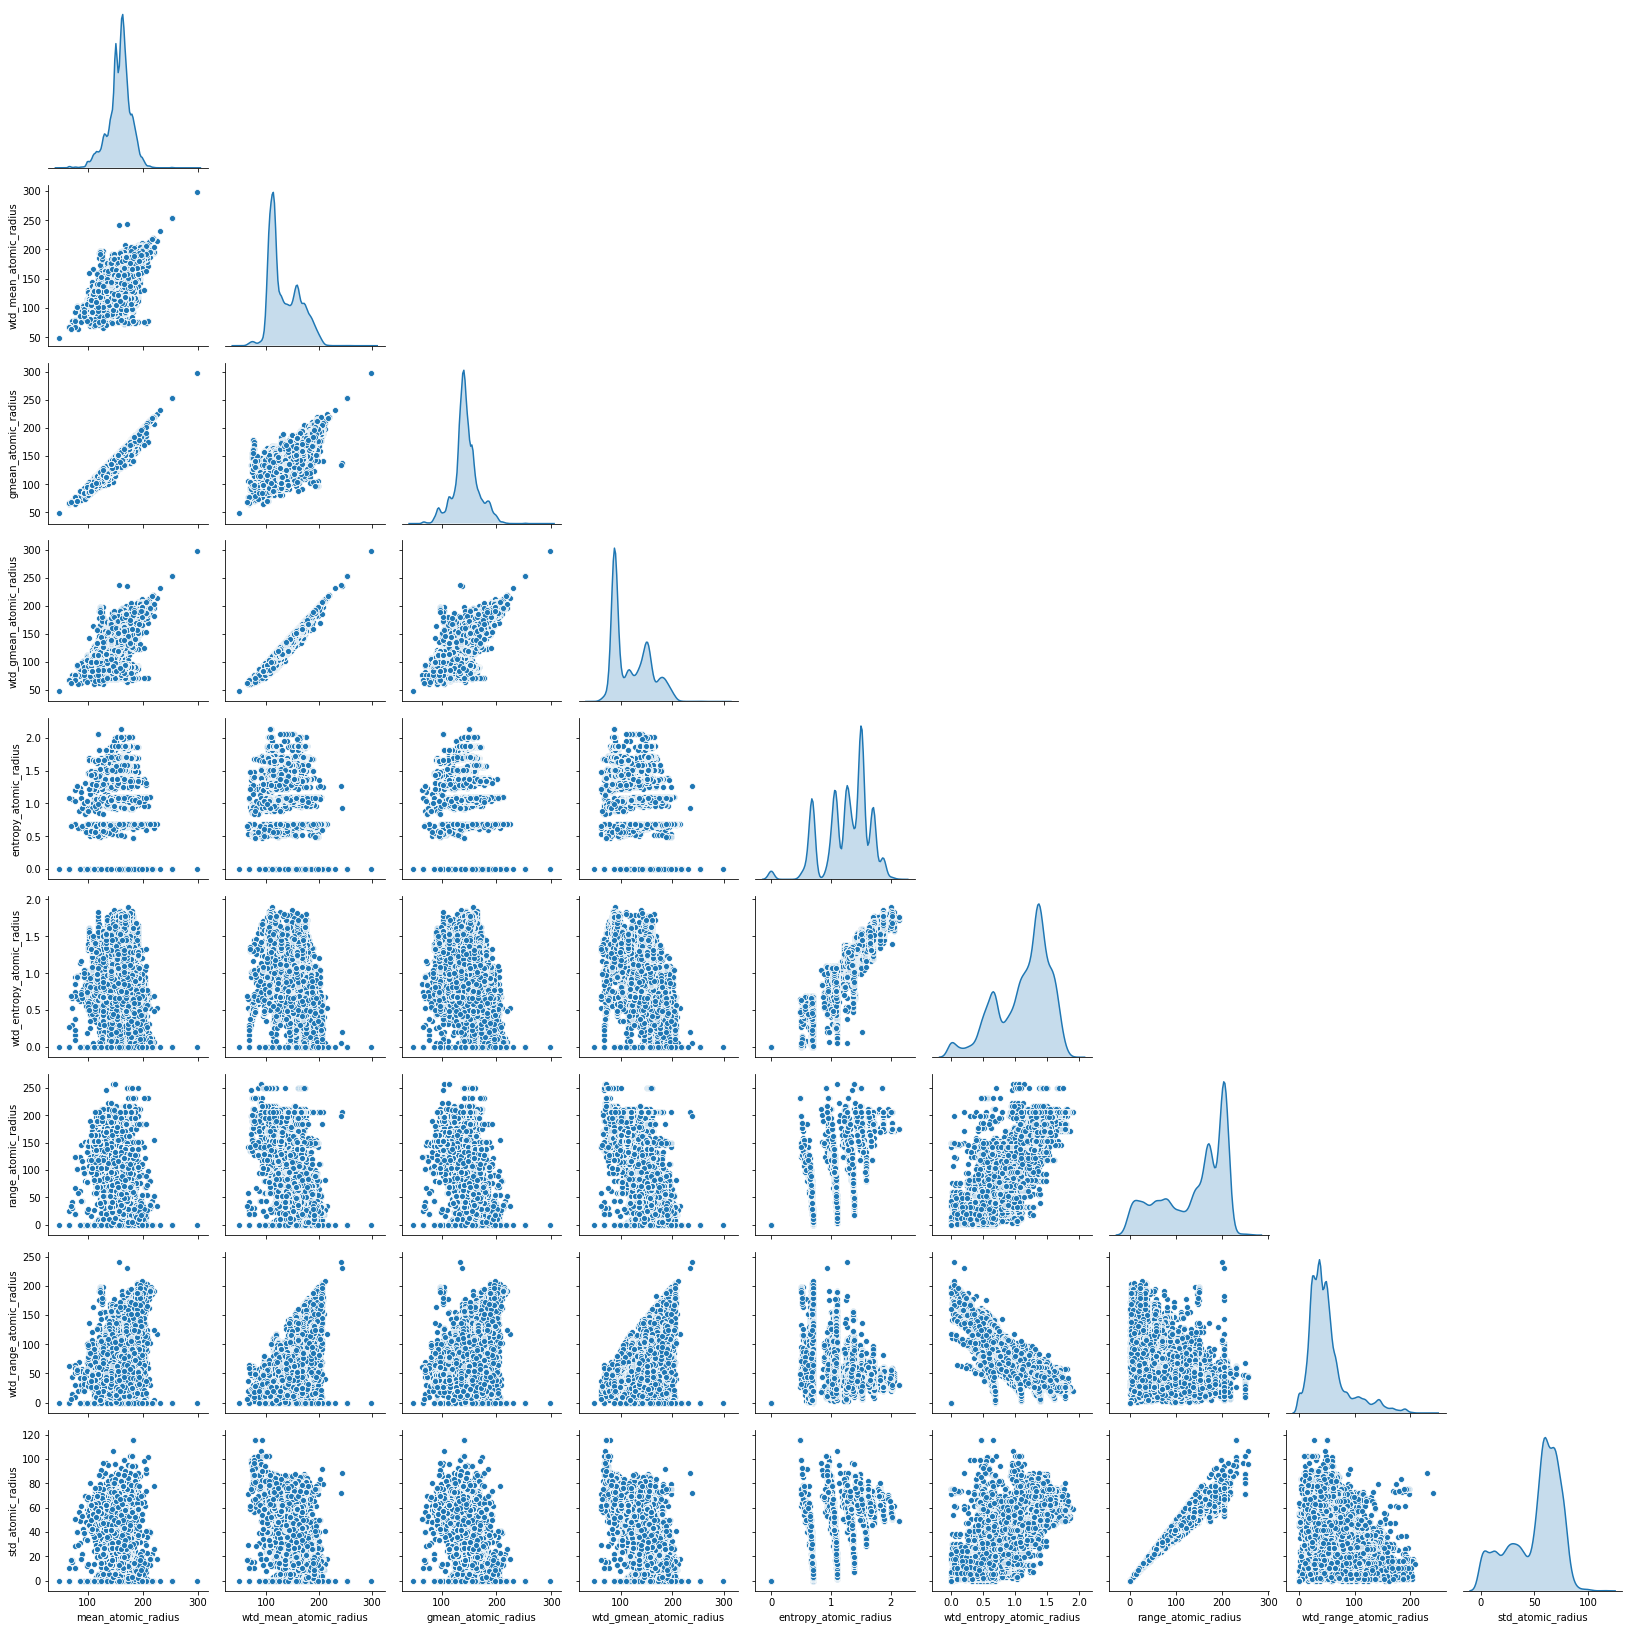

In [22]:
## drop gmean_atomic_radius, wtd_gmean_atomic_radius, range_atomic_radius 
g4 = sns.pairplot(atomic_radius.iloc[:,0:9], diag_kind="kde",corner=True)

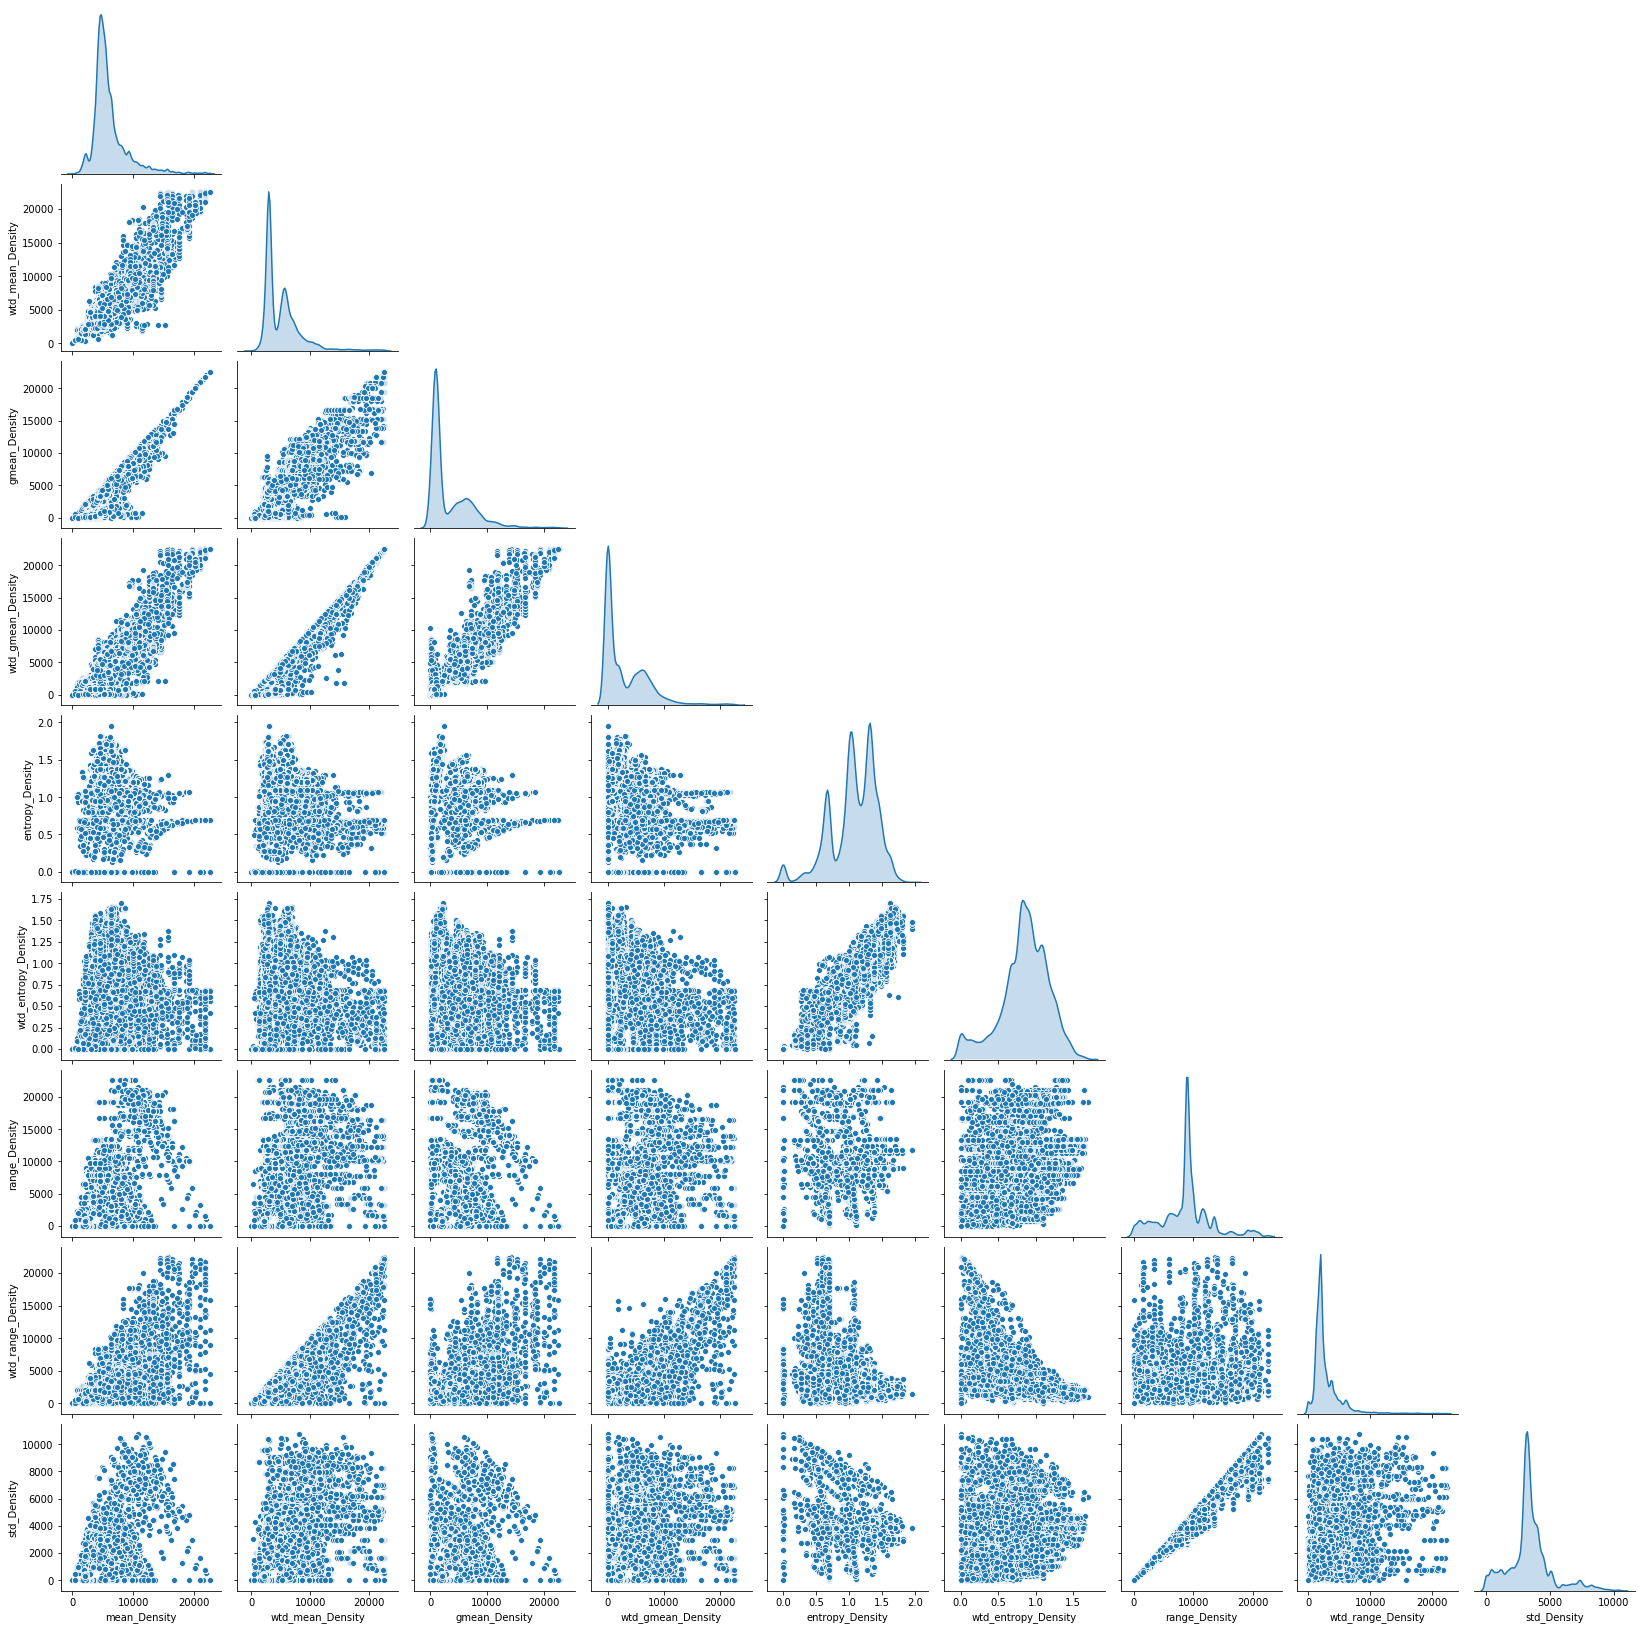

In [23]:
## drop gmean_density, wtd_gmean_density
g5 = sns.pairplot(density.iloc[:,0:9], diag_kind="kde",corner=True)

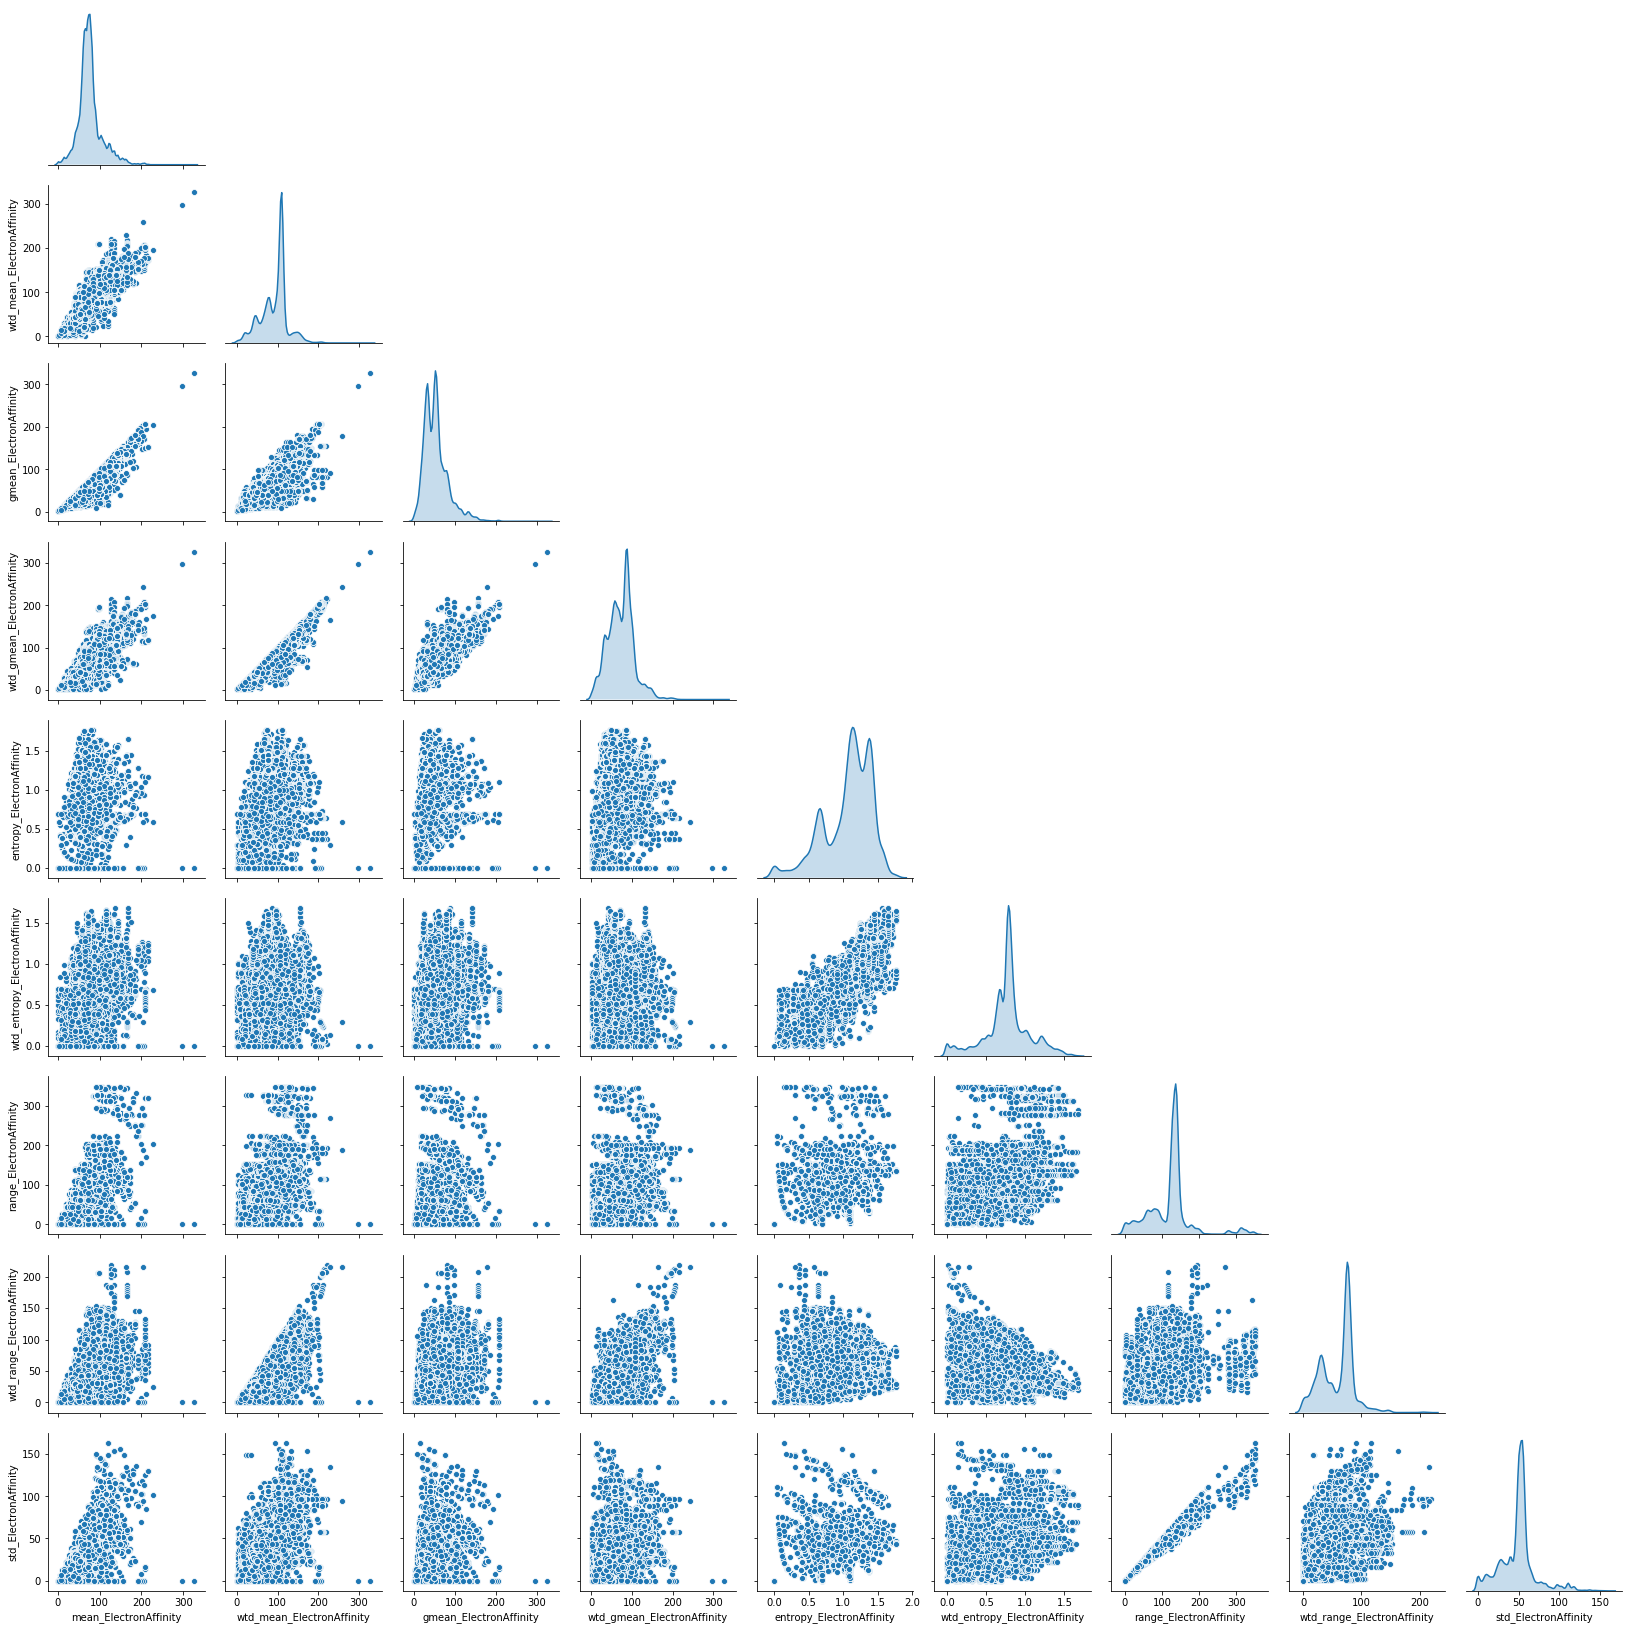

In [24]:
## drop gmean_ElectronAffinity, wtd_gmean_ElectronAffinity, range_ElectronAffinity
g6 = sns.pairplot(electron_affinity.iloc[:,0:9], diag_kind="kde",corner=True)

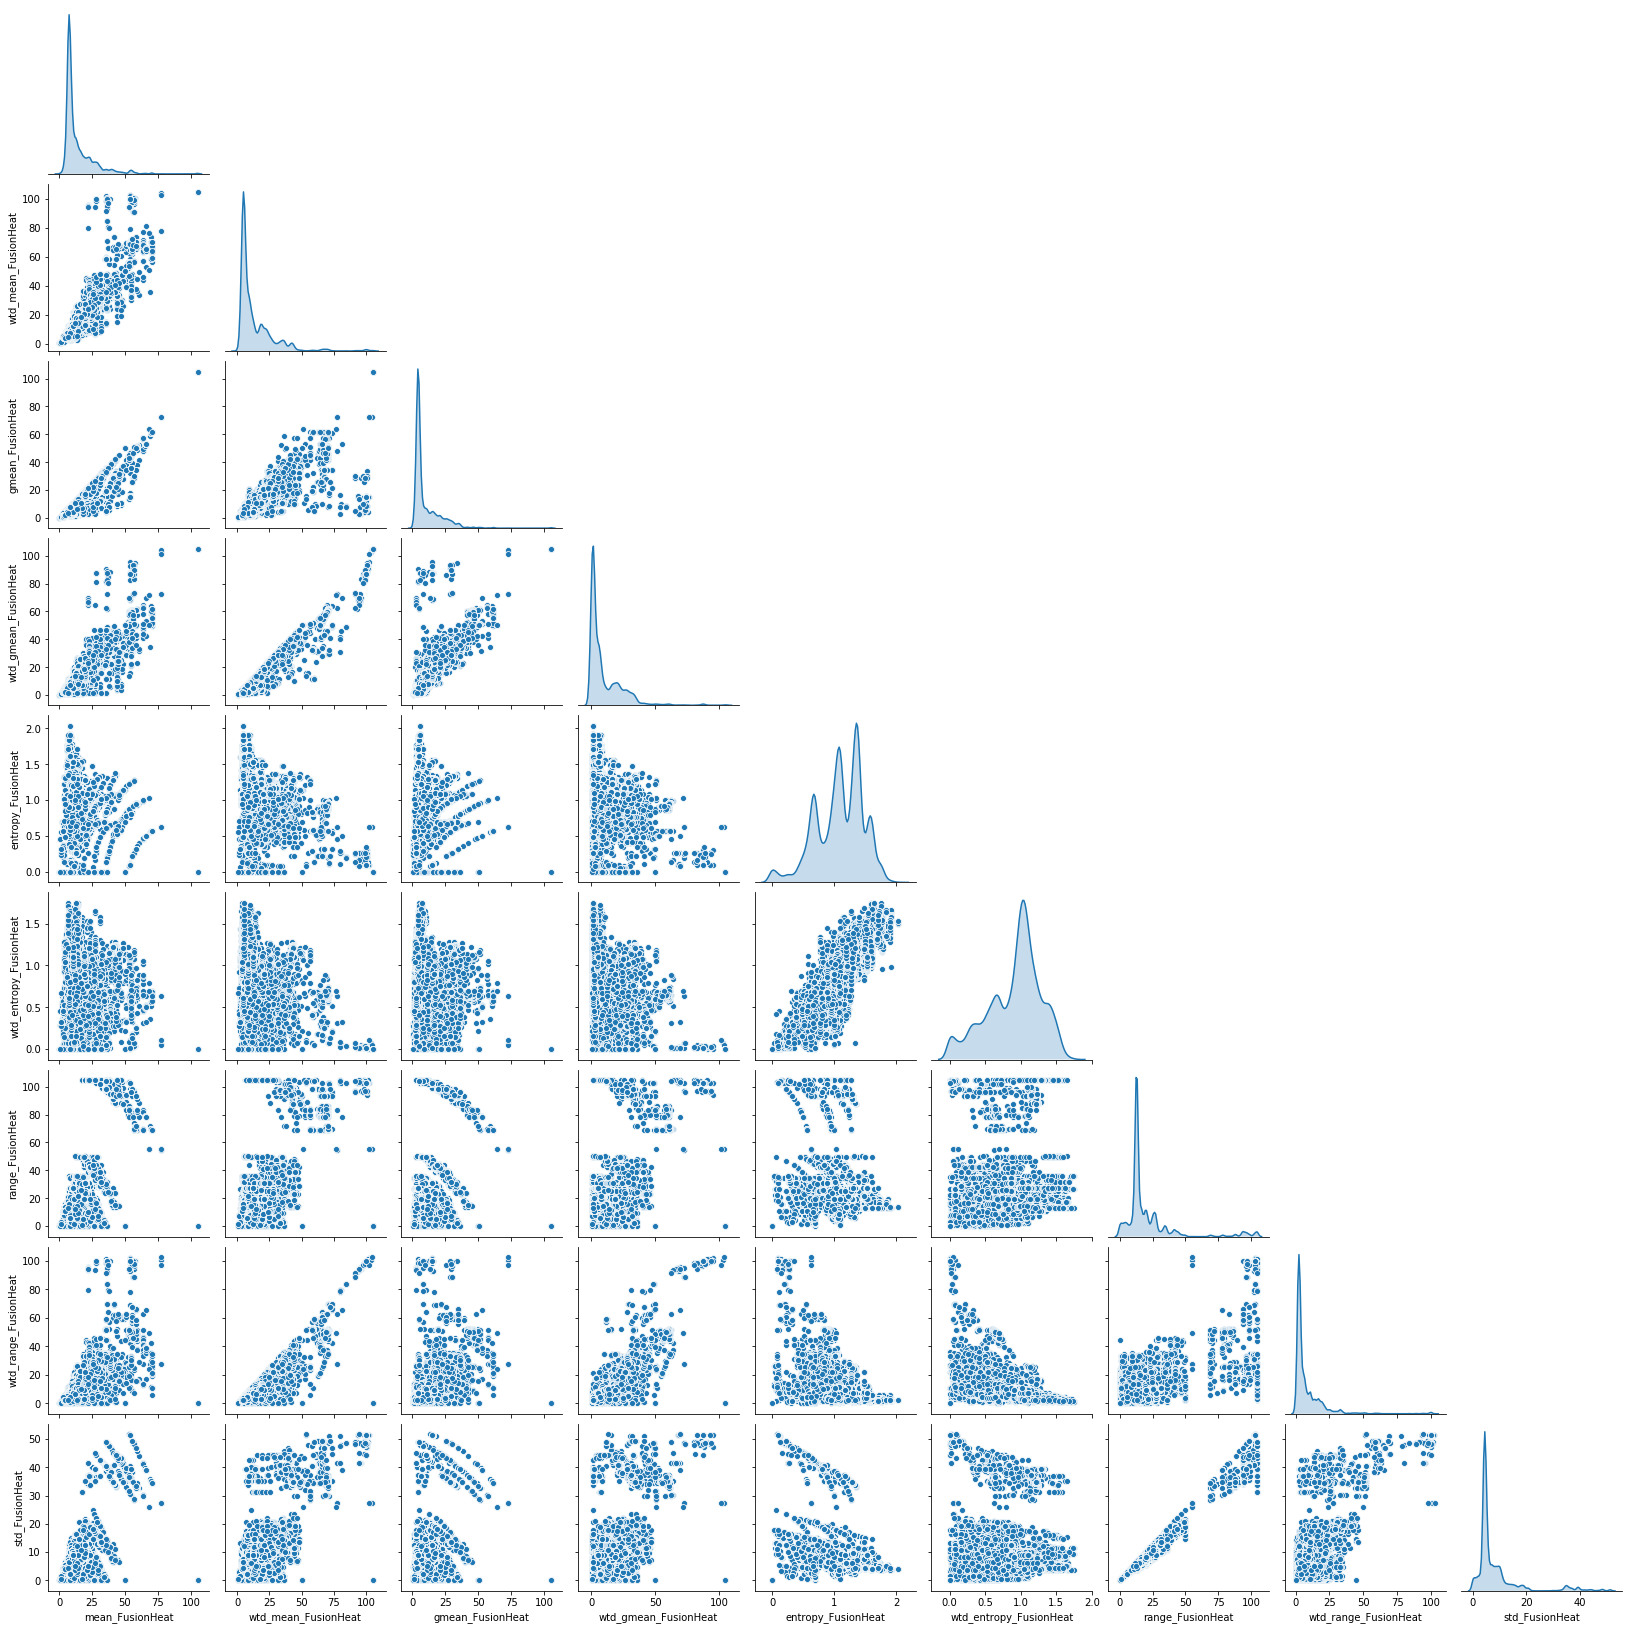

In [25]:
## drop range_FusionHeat
g7 = sns.pairplot(fusionheat.iloc[:,0:9], diag_kind="kde",corner=True)

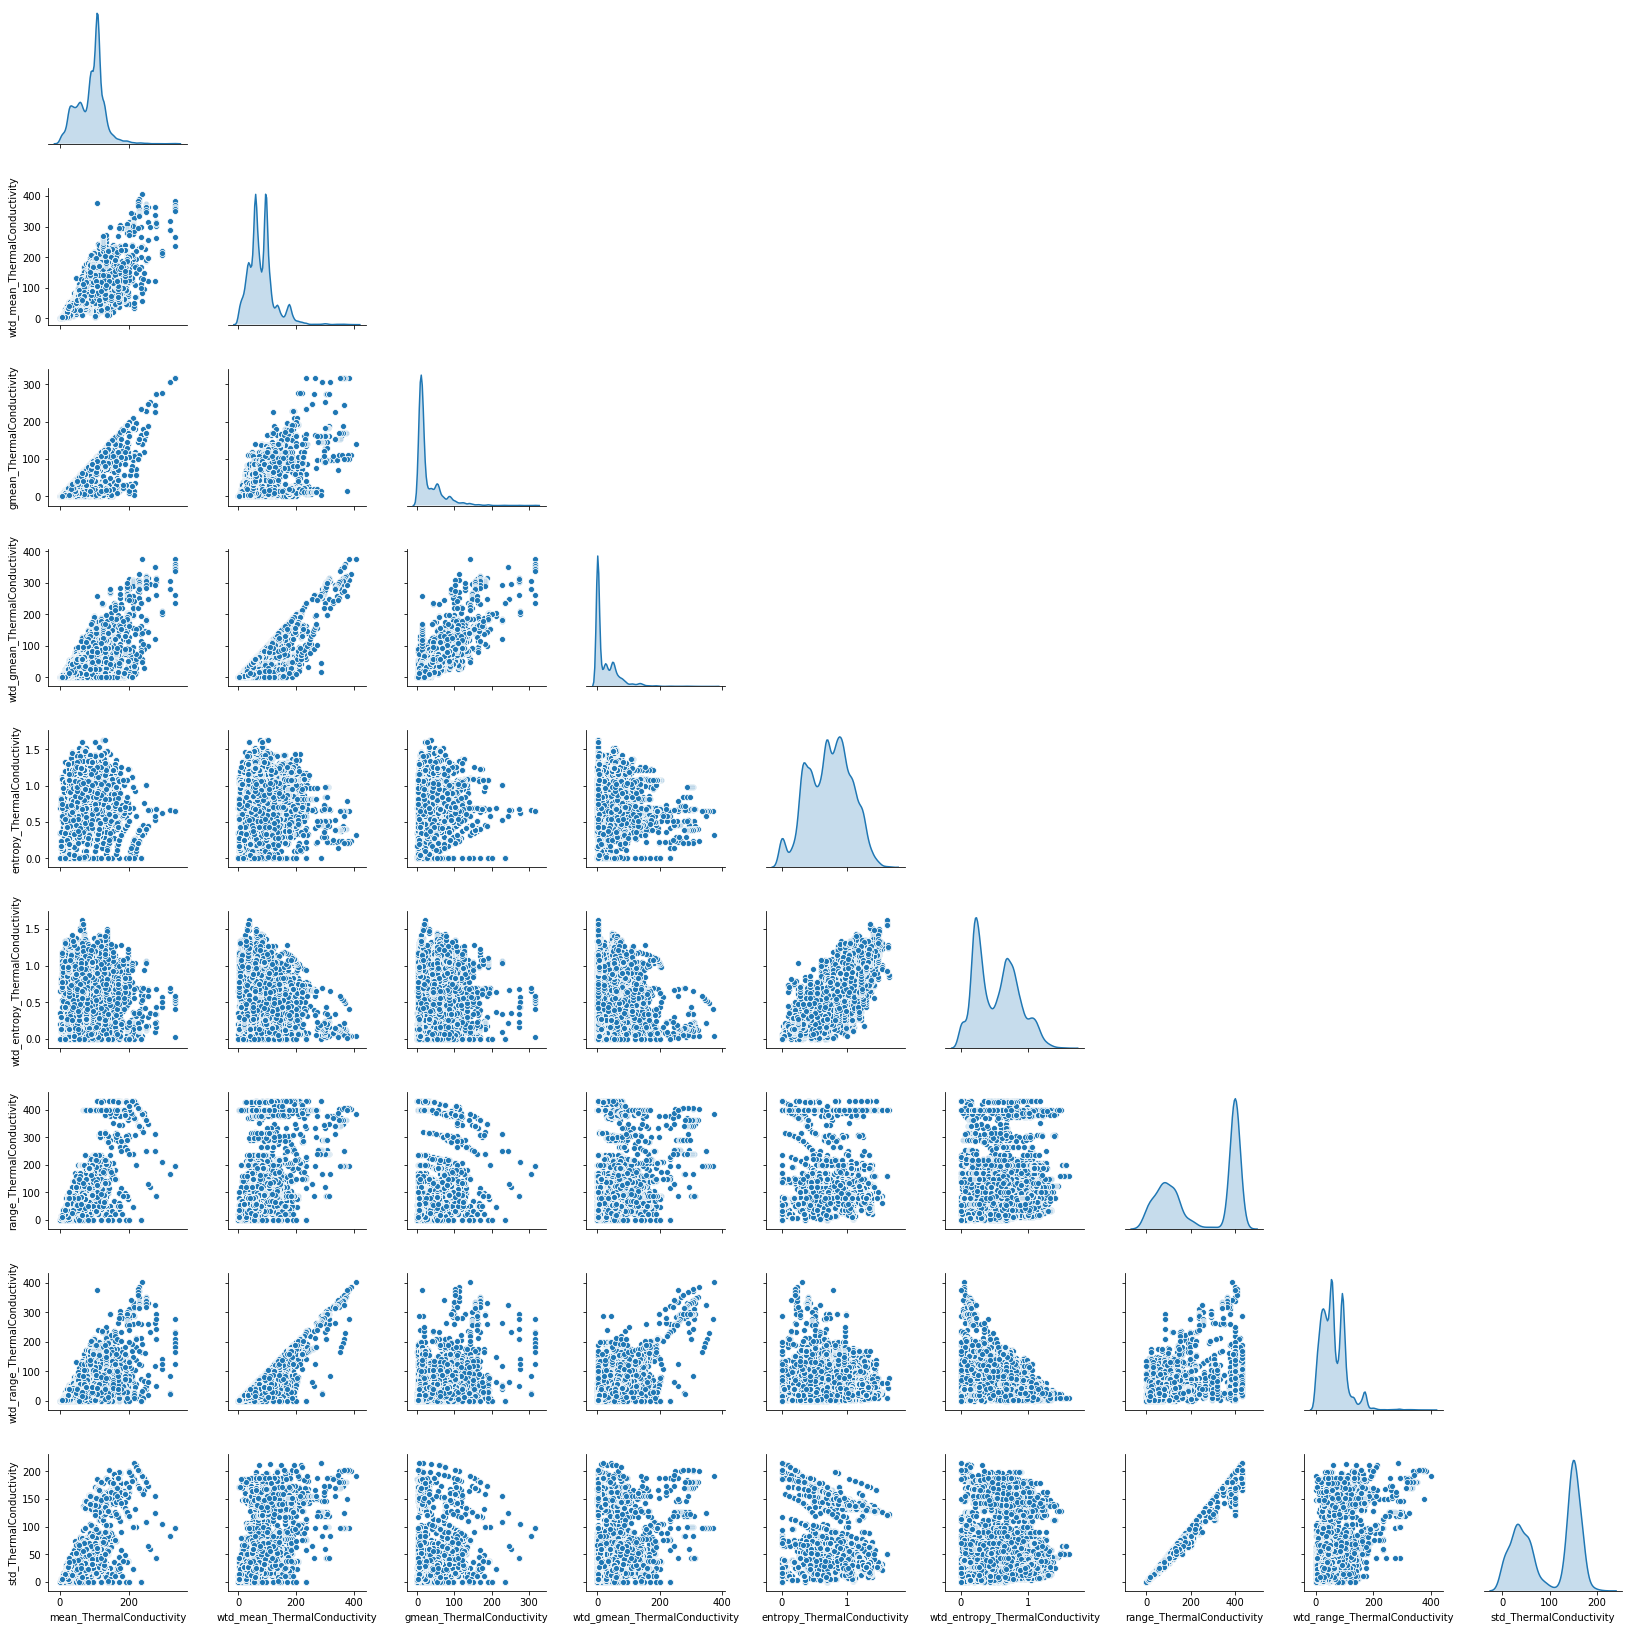

In [26]:
## Drop range_ThermalConductivity
g8 = sns.pairplot(thermal_conduct.iloc[:,0:9], diag_kind="kde",corner=True)

## Modeling based on the chosen features

In [27]:
## create a new dataframe with selected feaures
data2 = data.drop(['gmean_atomic_mass', 'wtd_gmean_atomic_mass',
                   'range_atomic_mass', 'gmean_fie', 'wtd_gmean_fie',
                   'range_fie', 'gmean_Valence', 'wtd_gmean_Valence',
                  'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 
                   'range_atomic_radius','gmean_Density', 'wtd_gmean_Density',
                'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 
                   'range_ElectronAffinity','range_FusionHeat', 
                  'range_ThermalConductivity'], axis=1)

In [28]:
## Combined the selected element columns and the chosen features together
data3 = pd.concat([unique4, data2],axis = 1)

/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


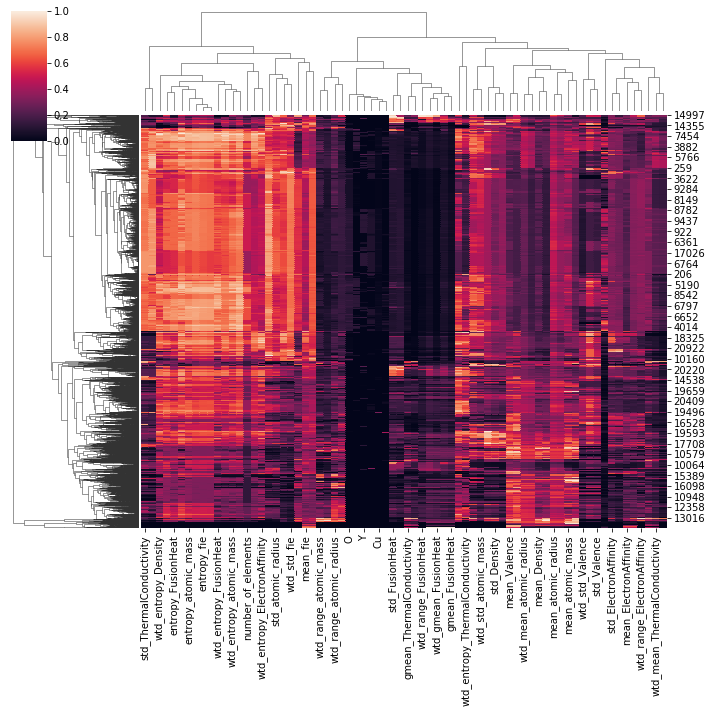

In [29]:
sns.clustermap(data3, standard_scale= 1)

## Regression Modeling

In [30]:
## Randomly separate the dataset into 70% training and 30% testing 
x = data3.loc[:, data3.columns != 'critical_temp']
y = data3['critical_temp']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### Linear Regression

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Fit the linear regression model and check the score of its performance
reg = LinearRegression().fit(x_train,y_train)

## Return the coefficient of determination R^2 of the prediction.
reg.score(x_train, y_train) 

0.7307776339226911

In [32]:
y_pred = reg.predict(x_test)
mean_squared_error(y_test, y_pred)

317.4200492375799

### Ridge Regression

In [33]:
## Perform ridge regression on the training dataset
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
ridge = clf.fit(x_train,y_train)

ridge.score(x_train,y_train)

0.7305564274302758

In [34]:
y_pred2 = ridge.predict(x_test)
mean_squared_error(y_test, y_pred2)

318.2777116871661

## Lasso regression 

In [35]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
lasso = clf.fit(x_train, y_train)

lasso.score(x_train,y_train)

/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946383.157493685, tolerance: 1999.1896797138957
  positive)


0.7187581085912419

In [36]:
y_pred3 = lasso.predict(x_test)
mean_squared_error(y_test, y_pred3)

336.84368968502963

## Prediction Modeling

In [37]:
## Separate the critical temperature into three groups and put label to each group
critical_temp = data.iloc[:,-1]

label = []
group = 0

for i in range(0, len(critical_temp)):
    if critical_temp[i] <= 50:
        group = 1 
        label.append(group)
    if critical_temp[i] > 50 and critical_temp[i] <= 100:
        group = 2
        label.append(group)
    if critical_temp[i] > 100:
        group = 3
        label.append(group)
        
label = pd.DataFrame(label)

In [38]:
## Combine the dataset that has selected features and the label column 
data4 = pd.concat([data3,label], axis = 1)
data4 = data4.drop('critical_temp',axis = 1)
data4 = data4.rename(columns={0: 'Group'})

In [39]:
x2 = data4.loc[:, data3.columns != 'Group']
y2 = data4['Group']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=100)

## Random Forest

In [40]:
## Random Forest as a classifier
tree = RandomForestClassifier(random_state=100)
tree.fit(x_train2, y_train2)
y_pred_3 = tree.predict(x_test2)

## check the accuracy of the random forest model
cor_rate = (y_pred_3 == y_test2).sum() / len(y_test2)  ## 0.9992946155654832
cor_rate

0.9992946155654832

In [41]:
## Score of the random forest predictive model 
scores = cross_val_score(tree, x_train2, y_train2, cv=10, scoring='accuracy')
tree_score, tree_sd = scores.mean(), scores.std() ##(0.9981187536743092, 0.00104505519310002)
tree_score, tree_sd

(0.9981187536743092, 0.00104505519310002)